In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA # Principle Component Analysis
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline # Make pipe line
from sklearn.cross_decomposition import PLSRegression # Partial Least squares
from sklearn.model_selection import KFold # k-fold cross validation

from tqdm import tqdm # a python package that provides progress bars for iterables

In [2]:
# Load data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train_copy = df_train.copy()

In [3]:
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
df_train.shape

(188318, 132)

In [5]:
# Features
x = df_train.iloc[:, :-1]
x.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,A,B,A,B,A,A,A,A,B,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,2,A,B,A,A,A,A,A,A,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,5,A,B,A,A,B,A,A,A,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,10,B,B,A,B,A,A,A,A,B,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,11,A,B,A,B,A,A,A,A,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [6]:
# Targets
y = df_train.iloc[:, -1]

In [7]:
# Check if we have null values in training data
df_train.isnull().sum().sum()

0

In [8]:
cat_col = df_train.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 116


['cat1', 'cat2', 'cat3', 'cat4', 'cat5']

In [9]:
cont_col = df_train.select_dtypes(include = ['float64', 'int64', 'int32']).columns.tolist()
print('Number of numeric columns: {}'.format(len(cont_col)))
cont_col[:5]

Number of numeric columns: 16


['id', 'cont1', 'cont2', 'cont3', 'cont4']

### Find categorical features with N vaiable in training dataset

In [10]:
# We need to do the same thing for test dataset

In [11]:
# List of unique categories in each column
cat_list = []
for column in cat_col:
    cat_list.append(len(df_train[column].unique().tolist()))

In [12]:
from collections import Counter
Counter(cat_list)

Counter({2: 72,
         3: 4,
         4: 12,
         8: 3,
         7: 4,
         5: 3,
         16: 2,
         15: 1,
         19: 2,
         9: 1,
         13: 1,
         17: 2,
         20: 2,
         11: 1,
         84: 1,
         131: 1,
         51: 1,
         61: 1,
         23: 1,
         326: 1})

In [13]:
# Distinct categories in the training dataset
A = list(Counter(cat_list).keys())
A

[2, 3, 4, 8, 7, 5, 16, 15, 19, 9, 13, 17, 20, 11, 84, 131, 51, 61, 23, 326]

In [14]:
# Number of columns for a given number of category 
B = list(Counter(cat_list).values())
B

[72, 4, 12, 3, 4, 3, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1]

In [15]:
df_cat = pd.DataFrame([])
df_cat['No. Variables'] = A
df_cat['No. Columns'] = B
df_cat.sort_values(by = 'No. Variables', inplace = True)
df_cat

,No. Variables,No. Columns
0,2,72
1,3,4
2,4,12
5,5,3
4,7,4
3,8,3
9,9,1
13,11,1
10,13,1
7,15,1


<IPython.core.display.Javascript object>


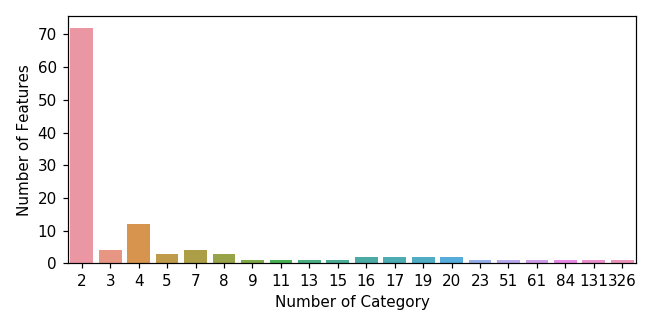

In [16]:
%matplotlib notebook
plt.figure(figsize=(6,3))
sns.barplot(A, B)
plt.xlabel('Number of Category')
plt.ylabel('Number of Features')
plt.tight_layout()

In [17]:
# We see that we have 70 columns with binary category

In [18]:
df_cat['No. Variables'][:6]

0    2
1    3
2    4
5    5
4    7
3    8
Name: No. Variables, dtype: int64

In [19]:
# Find categorical features with N vaiable in training dataset
def col_type_list(dataset, col_type_list):
    col_list = dataset.select_dtypes(include = col_type_list).columns
    #print(dataset.select_dtypes(include = col_type_list).shape)
    return col_list


def cat_uniq_list(dataset, label, N):
    
    column_obj = col_type_list(dataset, ['object', 'bool'])
    cat_uniq = dataset[column_obj].nunique()
    name = 'cat_{}_feat_'.format(N) + label
    uniq_list = cat_uniq[cat_uniq == N].index
    return{name: uniq_list}

dic = {}        
for i in [2, 3, 4, 5, 8]:       
    dic.update(cat_uniq_list(df_train, 'train', i))
    #dic.update(cat_uniq_list(df_test, 'test', i))
dic

{'cat_2_feat_train': Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
        'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
        'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
        'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33',
        'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41',
        'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
        'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
        'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
        'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72'],
       dtype='object'),
 'cat_3_feat_train': Index(['cat73', 'cat74', 'cat75', 'cat76'], dtype='object'),
 'cat_4_feat_train': Index(['cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
        'cat85', 'cat86', 'cat87', 'cat88'],
       dtype='obj

In [20]:
# Encode features with two variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_2 = LabelEncoder()

In [21]:
# Those columns with two variables
df_train[dic['cat_2_feat_train']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,A,B,A,B,A,A,A,A,B,A,...,A,A,A,A,A,A,A,A,A,A
1,A,B,A,A,A,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,A
2,A,B,A,A,B,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,A
3,B,B,A,B,A,A,A,A,B,A,...,A,A,A,A,A,A,A,A,A,A
4,A,B,A,B,A,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,B


# 2-Variable Categorical Features

In [22]:
#Atuencoding for 2-variable categorical features in training dataset
for i in dic['cat_2_feat_train']:
    df_train[i] = labelencoder_X_2.fit_transform(df_train[i])
df_train[dic['cat_2_feat_train']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Check if number of categorical features is reduced by 72 from 116:
cat_col_updated = df_train.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col_updated)))

Number of Categorical columns: 44


# N-Variable Categorical Features

In [24]:
# Define a function to encode  categorical features with more than 2 variables
def encode_features(cat_feature, N, dataset):
    n = len(cat_feature)
    x = dataset[cat_feature]
    k = 0
    col_name = []
    for i in range(n):
        columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [i + k])], remainder='passthrough') 
        x = np.array(columnTransformer.fit_transform(x), dtype = np.str)
        # Avoid dummy variable trap:
        x = x[:, 1:]
        k = (N - 2) * (i + 1)
        for j in range(1, N, 1):
            col_name.append(cat_feature[i] + '_' + str(N) + '_' + str(j))
        
    df = pd.DataFrame(x, columns = col_name, index = dataset.index)
    return df

In [25]:
# Autoencoder those columns with up to 8 variables
df3 = encode_features(dic['cat_{}_feat_train'.format(3)], 3, df_train)

In [26]:
df3.head()

,cat73_3_1,cat73_3_2,cat74_3_1,cat74_3_2,cat75_3_1,cat75_3_2,cat76_3_1,cat76_3_2
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Still columns are has object type
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   cat73_3_1  188318 non-null  object
 1   cat73_3_2  188318 non-null  object
 2   cat74_3_1  188318 non-null  object
 3   cat74_3_2  188318 non-null  object
 4   cat75_3_1  188318 non-null  object
 5   cat75_3_2  188318 non-null  object
 6   cat76_3_1  188318 non-null  object
 7   cat76_3_2  188318 non-null  object
dtypes: object(8)
memory usage: 11.5+ MB


In [28]:
df3_col = df3.columns.tolist()
df3_col

['cat73_3_1',
 'cat73_3_2',
 'cat74_3_1',
 'cat74_3_2',
 'cat75_3_1',
 'cat75_3_2',
 'cat76_3_1',
 'cat76_3_2']

In [29]:
# Now they are all float
for col in df3_col:
    df3[col] = df3[col].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cat73_3_1  188318 non-null  float64
 1   cat73_3_2  188318 non-null  float64
 2   cat74_3_1  188318 non-null  float64
 3   cat74_3_2  188318 non-null  float64
 4   cat75_3_1  188318 non-null  float64
 5   cat75_3_2  188318 non-null  float64
 6   cat76_3_1  188318 non-null  float64
 7   cat76_3_2  188318 non-null  float64
dtypes: float64(8)
memory usage: 11.5 MB


In [30]:
df4 = encode_features(dic['cat_{}_feat_train'.format(4)], 4, df_train)
df4_col = df4.columns.tolist()
for col in df4_col:
    df4[col] = df4[col].astype(float)

In [31]:
df5 = encode_features(dic['cat_{}_feat_train'.format(5)], 5, df_train)
df5_col = df5.columns.tolist()
for col in df5_col:
    df5[col] = df5[col].astype(float)

In [32]:
#df7 = encode_features(dic['cat_{}_feat_train'.format(7)], 7, df_train)
#df7_col = df7.columns.tolist()
#for col in df7_col:
#    df7[col] = df7[col].astype(float)

In [33]:
df8 = encode_features(dic['cat_{}_feat_train'.format(8)], 8, df_train)
df8_col = df8.columns.tolist()
for col in df8_col:
    df8[col] = df8[col].astype(float)

In [34]:
df_encoded_train =  pd.concat([df3, df4, df5, df8], axis=1)
df_encoded_train.head()

,cat73_3_1,cat73_3_2,cat74_3_1,cat74_3_2,cat75_3_1,cat75_3_2,cat76_3_1,cat76_3_2,cat77_4_1,cat77_4_2,...,cat91_8_5,cat91_8_6,cat91_8_7,cat96_8_1,cat96_8_2,cat96_8_3,cat96_8_4,cat96_8_5,cat96_8_6,cat96_8_7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_train_final = pd.concat([df_train.select_dtypes(include = ['float64', 'int64', 'int32']), 
                            df_encoded_train], axis=1)

Now we have a training dataset with numeric variables

In [36]:
cat_col = df_train_final.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 0


[]

In [37]:
df_train_final.shape

(188318, 165)

### Numeric Variables

In [38]:
# Average for each feature to see if we need feature scaling or not.
df_train_final[cont_col].mean()

id        294135.982561
cont1          0.493861
cont2          0.507188
cont3          0.498918
cont4          0.491812
cont5          0.487428
cont6          0.490945
cont7          0.484970
cont8          0.486437
cont9          0.485506
cont10         0.498066
cont11         0.493511
cont12         0.493150
cont13         0.493138
cont14         0.495717
loss        3037.337686
dtype: float64

In [39]:
x_numeric = df_train_copy.iloc[:, 1:-1].select_dtypes(include = ['float64', 'int64', 'int32']).values
y = df_train_copy['loss']
x_numeric

array([[0.7263  , 0.245921, 0.187583, ..., 0.594646, 0.822493, 0.714843],
       [0.330514, 0.737068, 0.592681, ..., 0.366307, 0.611431, 0.304496],
       [0.261841, 0.358319, 0.484196, ..., 0.373424, 0.195709, 0.774425],
       ...,
       [0.484469, 0.785784, 0.792378, ..., 0.443374, 0.339244, 0.503888],
       [0.438385, 0.422197, 0.298977, ..., 0.852865, 0.654753, 0.721707],
       [0.907272, 0.620805, 0.440642, ..., 0.946432, 0.810511, 0.72146 ]])

In [40]:
# Extract important features of numerical features using p-value
import statsmodels.regression.linear_model as sm

In [41]:
# Extract important features of numerical features using p-value and adjusted-R
def backwardElimination_p(x, y, sl):
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit() 
        maxVar = max(regressor_OLS.pvalues)#.astype(float)
        if maxVar > sl:
            for j in range(0, numVars - 1):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    
    print(regressor_OLS.summary())
    return x 
    

SL = 0.5
x_p_val = backwardElimination_p(x_numeric, y, SL)

                                 OLS Regression Results                                
Dep. Variable:                   loss   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.539
Method:                 Least Squares   F-statistic:                          1.575e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:56:35   Log-Likelihood:                     -1.7654e+06
No. Observations:              188318   AIC:                                  3.531e+06
Df Residuals:                  188304   BIC:                                  3.531e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
"""We see one of numerical features has a large p-value
This feature has not a big contribution on loss and we can remove it.
So lets set SL = 0.05"""
# Extract important features of numerical features using p-value and adjusted-R
def backwardElimination_p(x, y, sl):
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit() 
        maxVar = max(regressor_OLS.pvalues)#.astype(float)
        if maxVar > sl:
            for j in range(0, numVars - 1):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    
    print(regressor_OLS.summary())
    return x 
    

SL = 0.05
x_p_val = backwardElimination_p(x_numeric, y, SL)

                                 OLS Regression Results                                
Dep. Variable:                   loss   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.539
Method:                 Least Squares   F-statistic:                          1.697e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:56:43   Log-Likelihood:                     -1.7654e+06
No. Observations:              188318   AIC:                                  3.531e+06
Df Residuals:                  188305   BIC:                                  3.531e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
"""Notice that the coefficients for x1, ..., x13 are very large relative to their
standard errors, so the t-statistics are also large; the probabilities of seeing
such values if H0 (H0: there is no relationship between X and Y) is true are virtually zero. 
Hence we can conclude that
x1, ..., x13 are not zero"""
# Lets remove cont10 from features as it has large p-value
df_train_final.drop(columns = ['cont10'], inplace = True)

In [44]:
df_train_final.shape

(188318, 164)

# Autoencoding for test set

In [45]:
# Load data
df_test = pd.read_csv('data/test.csv')

In [46]:
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [47]:
df_test.shape

(125546, 131)

In [48]:
# Check if we have null values in test data
df_test.isnull().sum().sum()

0

In [49]:
cat_col = df_test.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 116


['cat1', 'cat2', 'cat3', 'cat4', 'cat5']

In [50]:
cont_col = df_test.select_dtypes(include = ['float64', 'int64', 'int32']).columns.tolist()
print('Number of numeric columns: {}'.format(len(cont_col)))
cont_col[:5]

Number of numeric columns: 15


['id', 'cont1', 'cont2', 'cont3', 'cont4']

In [51]:
# List of unique categories in each column
cat_list = []
for column in cat_col:
    cat_list.append(len(df_test[column].unique().tolist()))

In [52]:
Counter(cat_list)

Counter({2: 72,
         3: 4,
         4: 12,
         8: 3,
         6: 1,
         5: 3,
         7: 3,
         9: 1,
         17: 3,
         15: 1,
         14: 1,
         18: 3,
         20: 1,
         11: 1,
         74: 1,
         123: 1,
         16: 1,
         51: 1,
         60: 1,
         23: 1,
         311: 1})

In [53]:
# Distinct categories in the training dataset
A = list(Counter(cat_list).keys())
# Number of columns for a given number of category 
B = list(Counter(cat_list).values())

In [54]:
df_cat_test = pd.DataFrame([])
df_cat_test['No. Variables test'] = A
df_cat_test['No. Columns test'] = B
df_cat_test.sort_values(by = 'No. Variables test', inplace = True)
df_cat_test

,No. Variables test,No. Columns test
0,2,72
1,3,4
2,4,12
5,5,3
4,6,1
6,7,3
3,8,3
7,9,1
13,11,1
10,14,1


In [55]:
# Compare with training set to see if they have the same number of variables:
df_cat_all =  pd.concat([df_cat, df_cat_test], axis=1)
df_cat_all.sort_values(by = 'No. Variables', inplace = True)
df_cat_all

,No. Variables,No. Columns,No. Variables test,No. Columns test
0,2.0,72.0,2,72
1,3.0,4.0,3,4
2,4.0,12.0,4,12
5,5.0,3.0,5,3
4,7.0,4.0,6,1
3,8.0,3.0,8,3
9,9.0,1.0,15,1
13,11.0,1.0,11,1
10,13.0,1.0,14,1
7,15.0,1.0,9,1


<IPython.core.display.Javascript object>


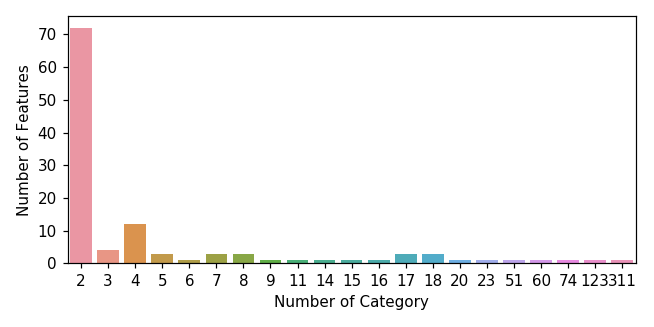

In [56]:
%matplotlib notebook
plt.figure(figsize=(6,3))
sns.barplot(A, B)
plt.xlabel('Number of Category')
plt.ylabel('Number of Features')
plt.tight_layout()

Note that in training dataset we had not a column with 6 categorical variables
So we should ignore the column with 6 variables and just keep columns with 
2, 3, 4, 5, 7, and 8 variables
On the other hand we don't have a column with 7 variables in test dataset
So we keep only those columns with 2, 3, 4, 5 and 8 variables

In [57]:
dic = {}        
for i in [2, 3, 4, 5, 8]:       
    dic.update(cat_uniq_list(df_test, 'test', i))
dic

{'cat_2_feat_test': Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
        'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
        'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
        'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33',
        'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41',
        'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
        'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
        'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
        'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72'],
       dtype='object'),
 'cat_3_feat_test': Index(['cat73', 'cat74', 'cat75', 'cat76'], dtype='object'),
 'cat_4_feat_test': Index(['cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
        'cat85', 'cat86', 'cat87', 'cat88'],
       dtype='object

In [58]:
#Atuencoding for 2-variable categorical features in training dataset
for i in dic['cat_2_feat_test']:
    df_test[i] = labelencoder_X_2.fit_transform(df_test[i])
df_test[dic['cat_2_feat_test']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Check if number of categorical features is reduced by 72 from 116:
cat_col_updated = df_test.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col_updated)))

Number of Categorical columns: 44


In [60]:
df3 = encode_features(dic['cat_{}_feat_test'.format(3)], 3, df_test)
df3_col = df3.columns.tolist()
for col in df3_col:
    df3[col] = df3[col].astype(float)
    
df4 = encode_features(dic['cat_{}_feat_test'.format(4)], 4, df_test)
df4_col = df4.columns.tolist()
for col in df4_col:
    df4[col] = df4[col].astype(float)
    
df5 = encode_features(dic['cat_{}_feat_test'.format(5)], 5, df_test)
df5_col = df5.columns.tolist()
for col in df5_col:
    df5[col] = df5[col].astype(float)
    
#df7 = encode_features(dic['cat_{}_feat_test'.format(7)], 7, df_test)
#df7_col = df7.columns.tolist()
#for col in df7_col:
#    df7[col] = df7[col].astype(float)
    
df8 = encode_features(dic['cat_{}_feat_test'.format(8)], 8, df_test)
df8_col = df8.columns.tolist()
for col in df8_col:
    df8[col] = df8[col].astype(float)

In [61]:
df_encoded_test =  pd.concat([df3, df4, df5, df8], axis=1)
df_encoded_test.head()

,cat73_3_1,cat73_3_2,cat74_3_1,cat74_3_2,cat75_3_1,cat75_3_2,cat76_3_1,cat76_3_2,cat77_4_1,cat77_4_2,...,cat91_8_5,cat91_8_6,cat91_8_7,cat92_8_1,cat92_8_2,cat92_8_3,cat92_8_4,cat92_8_5,cat92_8_6,cat92_8_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_test_final = pd.concat([df_test.select_dtypes(include = ['float64', 'int64', 'int32']), 
                            df_encoded_test], axis=1)

In [63]:
# Lets remove cont10 from features as it has large p-value
df_test_final.drop(columns = ['cont10'], inplace = True)

In [64]:
cat_col = df_test_final.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 0


[]

In [65]:
df_test_final.shape

(125546, 163)

In [66]:
df_train_final.shape

(188318, 164)

### Principle Component Analysis

In [69]:
x = df_train_final.drop(columns = ['id', 'loss'])
x.shape

(188318, 162)

In [70]:
y = df_train_final['loss']

In [71]:
x_test = df_test_final.drop(columns = ['id'])
x_test.shape

(125546, 162)

In [72]:
model_pca = PCA()

In [73]:
model_pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
# Look at first 5 principal components
model_pca.components_[:, :5]

array([[-5.76793723e-02,  1.66901459e-01,  2.72479247e-02,
         3.42878479e-02, -3.44165171e-03],
       [-1.28978133e-01,  3.39511938e-01,  6.62449974e-02,
         5.68859376e-02,  4.20018526e-02],
       [-9.00461596e-02, -3.38160065e-01,  5.30762740e-02,
         1.86038332e-01, -5.15344607e-02],
       [ 9.68488695e-03, -1.16730634e-01,  4.71551373e-03,
        -4.02351561e-01,  5.83203882e-01],
       [ 5.55491212e-02, -8.15687230e-02, -4.34146202e-02,
         2.93436599e-01,  2.01231586e-02],
       [-8.29913219e-02,  1.64954637e-01,  5.04727864e-02,
        -3.10240594e-01, -1.53288167e-01],
       [ 5.15463889e-02,  8.19614314e-03,  2.68151642e-02,
        -6.57111321e-02, -1.02652523e-01],
       [ 1.12034483e-01, -2.30682694e-02, -2.39091759e-02,
        -1.09248972e-01, -7.68586886e-02],
       [-1.42431988e-01,  3.01891123e-02, -5.57953469e-02,
         7.19743338e-02,  1.31680023e-01],
       [ 1.08128323e-02,  8.52966433e-03,  1.70120857e-02,
        -5.70171667e-02

In [75]:
# proportion of variance explained 
# by each of the four principal components in the USArrests data
proportion = model_pca.explained_variance_ratio_
proportion

array([1.20149117e-01, 1.02080499e-01, 5.62968412e-02, 5.28808135e-02,
       4.41460032e-02, 4.23308812e-02, 3.15336055e-02, 3.12242169e-02,
       2.97879811e-02, 2.56750001e-02, 2.29763649e-02, 2.24829614e-02,
       2.09632032e-02, 1.92101762e-02, 1.79111939e-02, 1.67394051e-02,
       1.51990131e-02, 1.45007302e-02, 1.39723560e-02, 1.31856534e-02,
       1.29339151e-02, 1.13536717e-02, 1.11353309e-02, 1.07859682e-02,
       1.06461522e-02, 9.49885413e-03, 9.22255433e-03, 8.48116241e-03,
       8.32757939e-03, 7.51213799e-03, 7.13119055e-03, 6.73967425e-03,
       6.40344906e-03, 6.17205695e-03, 6.01312653e-03, 5.94100984e-03,
       5.65699643e-03, 5.44181119e-03, 5.28616795e-03, 5.23233369e-03,
       5.00645520e-03, 4.55218263e-03, 4.53370958e-03, 4.42922399e-03,
       4.27785473e-03, 4.09895792e-03, 3.99717403e-03, 3.89325005e-03,
       3.77929396e-03, 3.64294324e-03, 3.43051523e-03, 3.34641175e-03,
       3.27760471e-03, 3.19564789e-03, 3.18973386e-03, 2.85434247e-03,
      

<IPython.core.display.Javascript object>


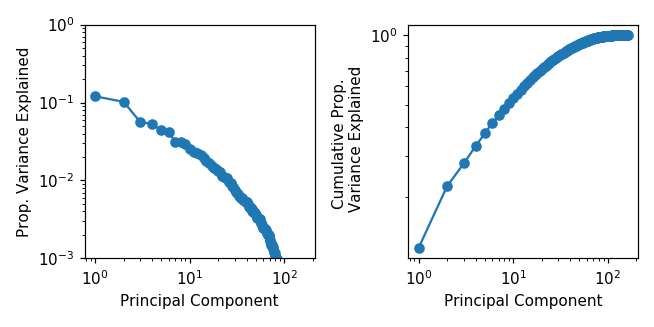

In [76]:
%matplotlib notebook
fig, axe = plt.subplots(1, 2, figsize = (6, 3))
axe[0].plot(range(1, x.shape[1]+1), proportion, marker = 'o')
axe[0].set_ylabel('Prop. Variance Explained')
axe[0].set_xlabel('Principal Component')
axe[0].set_ylim(0.001, 1)
axe[0].semilogx()
axe[0].semilogy()

cumul_prop = [sum(proportion[:i+1]) for i in range(len(proportion))]
axe[1].plot(range(1, x.shape[1]+1), cumul_prop, marker = 'o')
axe[1].set_ylabel('Cumulative Prop. \n Variance Explained')
axe[1].set_xlabel('Principal Component')
axe[1].semilogx()
axe[1].semilogy()


plt.tight_layout()

In [77]:
LR = LinearRegression()

In [80]:
# Compute the ten-fold cross-validation error using the first 10 principal components
# with Pipeline
number_of_pca = 10
results = []
variance_percentage = []
for i in range(1, number_of_pca + 1):
    print(i)
    model_pca = PCA(n_components=i)
    pipeline = Pipeline([('PCA', model_pca), ('linear_regression', LR)])
    pipeline.fit(x, y)


    # Note cross val score has no mean_squared_error scoring! instead negative root MSE!
    # List of scoring can be found using sorted(sklearn.metrics.SCORERS.keys())
    score = cross_val_score(pipeline, x, y, scoring='neg_root_mean_squared_error', cv = 10)
    results.append(np.mean(score**2))
    variance_percentage.append(np.sum(model_pca.explained_variance_ratio_)*100)

1
2
3
4
5
6
7
8
9
10


<IPython.core.display.Javascript object>


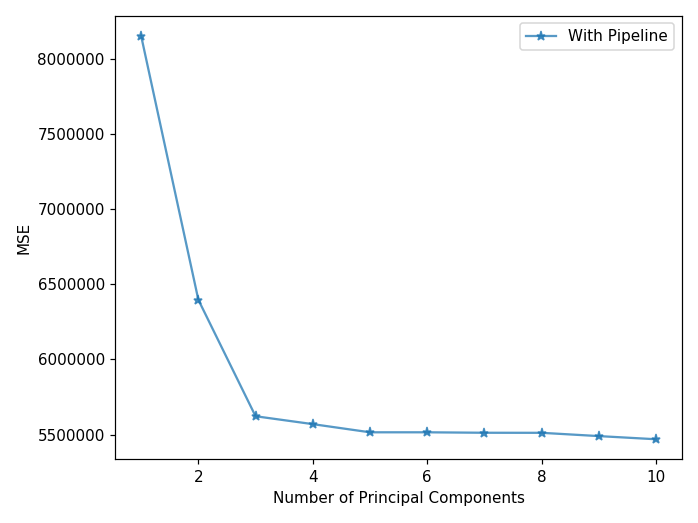

In [81]:
%matplotlib notebook
plt.plot(range(1, number_of_pca+1), results, alpha = 0.75, label = 'With Pipeline', marker = '*')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.tight_layout()
plt.savefig('MSE_vs_principal_components.png', dp1 = 100)

<IPython.core.display.Javascript object>


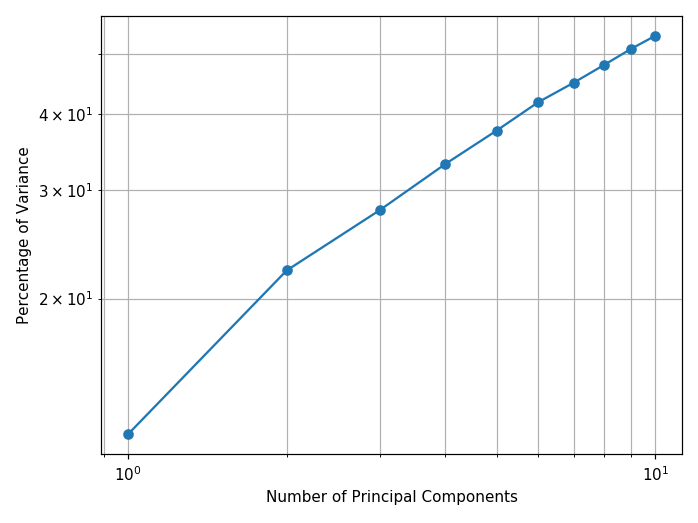

In [83]:
# Now lets plot percentage of variance explained
# in the predictors and in the response using different numbers of components


%matplotlib notebook
plt.plot(range(1, number_of_pca+1), variance_percentage, marker= 'o')
plt.semilogx()
plt.semilogy()
plt.grid(which = 'both')
plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage of Variance')
plt.tight_layout()
plt.savefig('percentage_of_variance_vs_components.png', dpi = 100)

We now perform PCR on the training data

In [84]:
model_pca = PCA(n_components=100)
pipeline = Pipeline([('PCA', model_pca), ('linear_regression', LR)])
pipeline.fit(x, y)
predictions = pipeline.predict(x_test)

In [85]:
def submission(ID, prediction, file_name):
    df = pd.DataFrame({'id': ID, 'loss': prediction})
    df.to_csv(file_name + '.csv', index = False)

In [86]:
submission(df_test_final['id'], predictions, 'PCA_100_components_LR')

The best public score is obtained with 100 pca: 1320

So far we have not digging into features. 
Now lets see which features are most important using p-values